# 0.0 Imports

In [1]:
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML

# 1.0 Criando o projeto TripAdvisor

No terminal:
 
 * Criar ambiente virtual
 
 * Ativar ambiente virtual
 
 * Criar a pasta padrão do scrapy para o projeto 
 
     * scrapy startproject trip
 
 * Entrar na pasta do projeto
 
 * Criar a primeira aranha
 
     * scrapy genspider tripadvisor tripadvisor.com.br
 

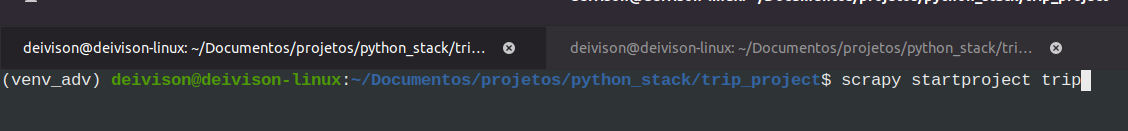

In [2]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/projeto_0.png")

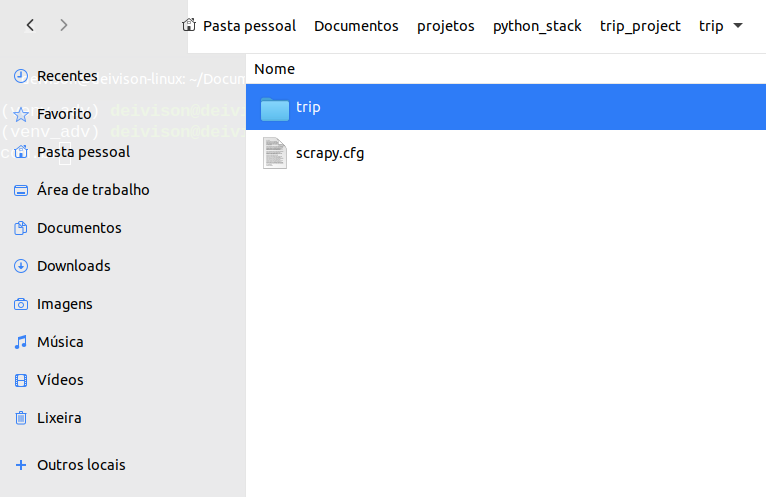

In [3]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/projeto_1.png")

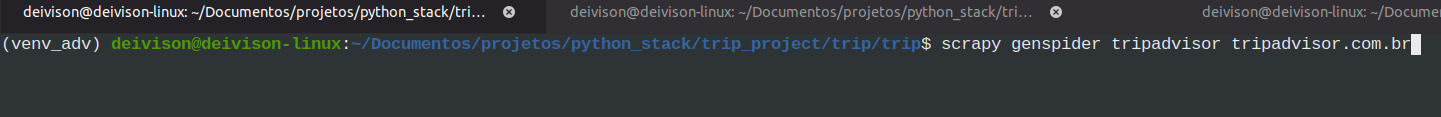

In [4]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/projeto_2.png")

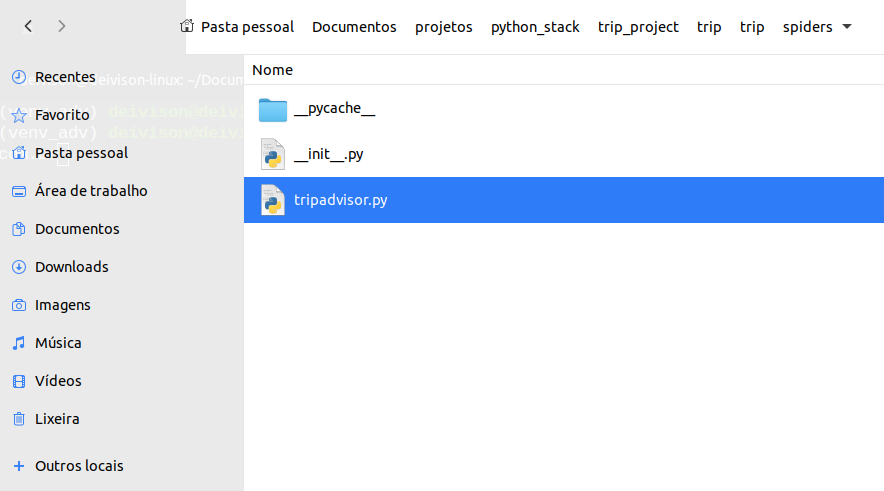

In [5]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/projeto_3.png")

# 2.0 Identificar os padrões dos comentários na página HTML

url onde os comentarios serao coletados

* https://www.tripadvisor.com.br/Attraction_Review-g303441-d553398-Reviews-Parque_Barigui-Curitiba_State_of_Parana.html

* 10 comentarios por pagina

* 7065 paginas

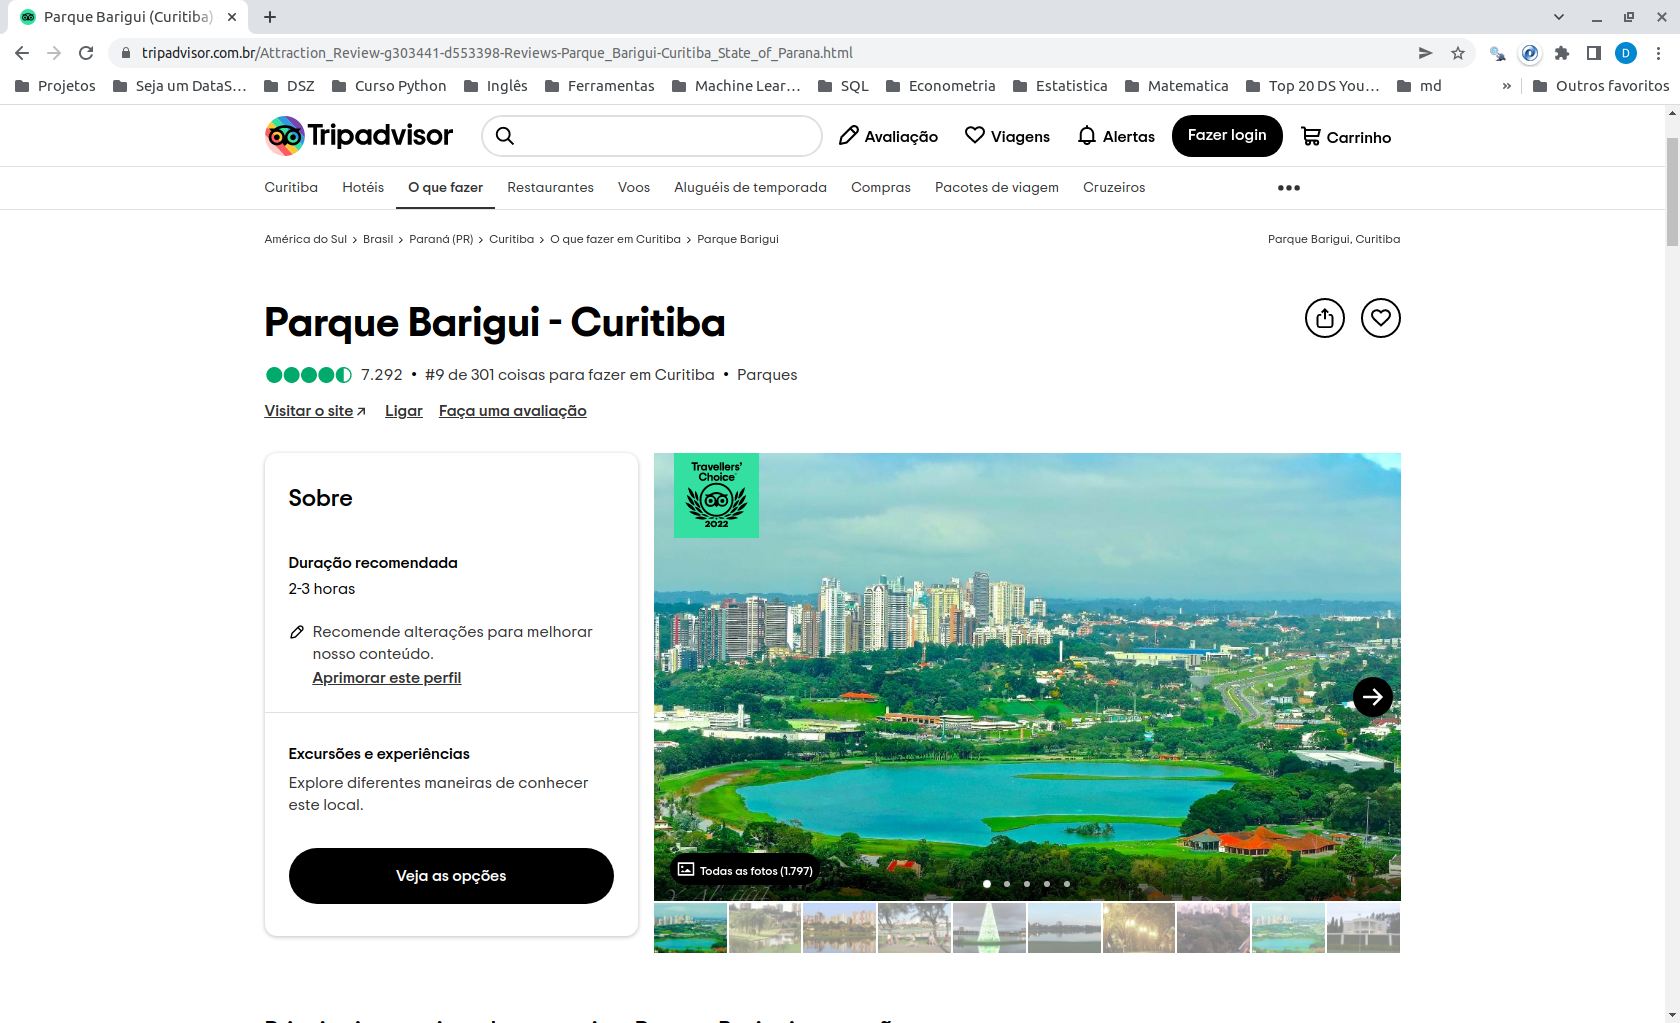

In [6]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/url_1.png")

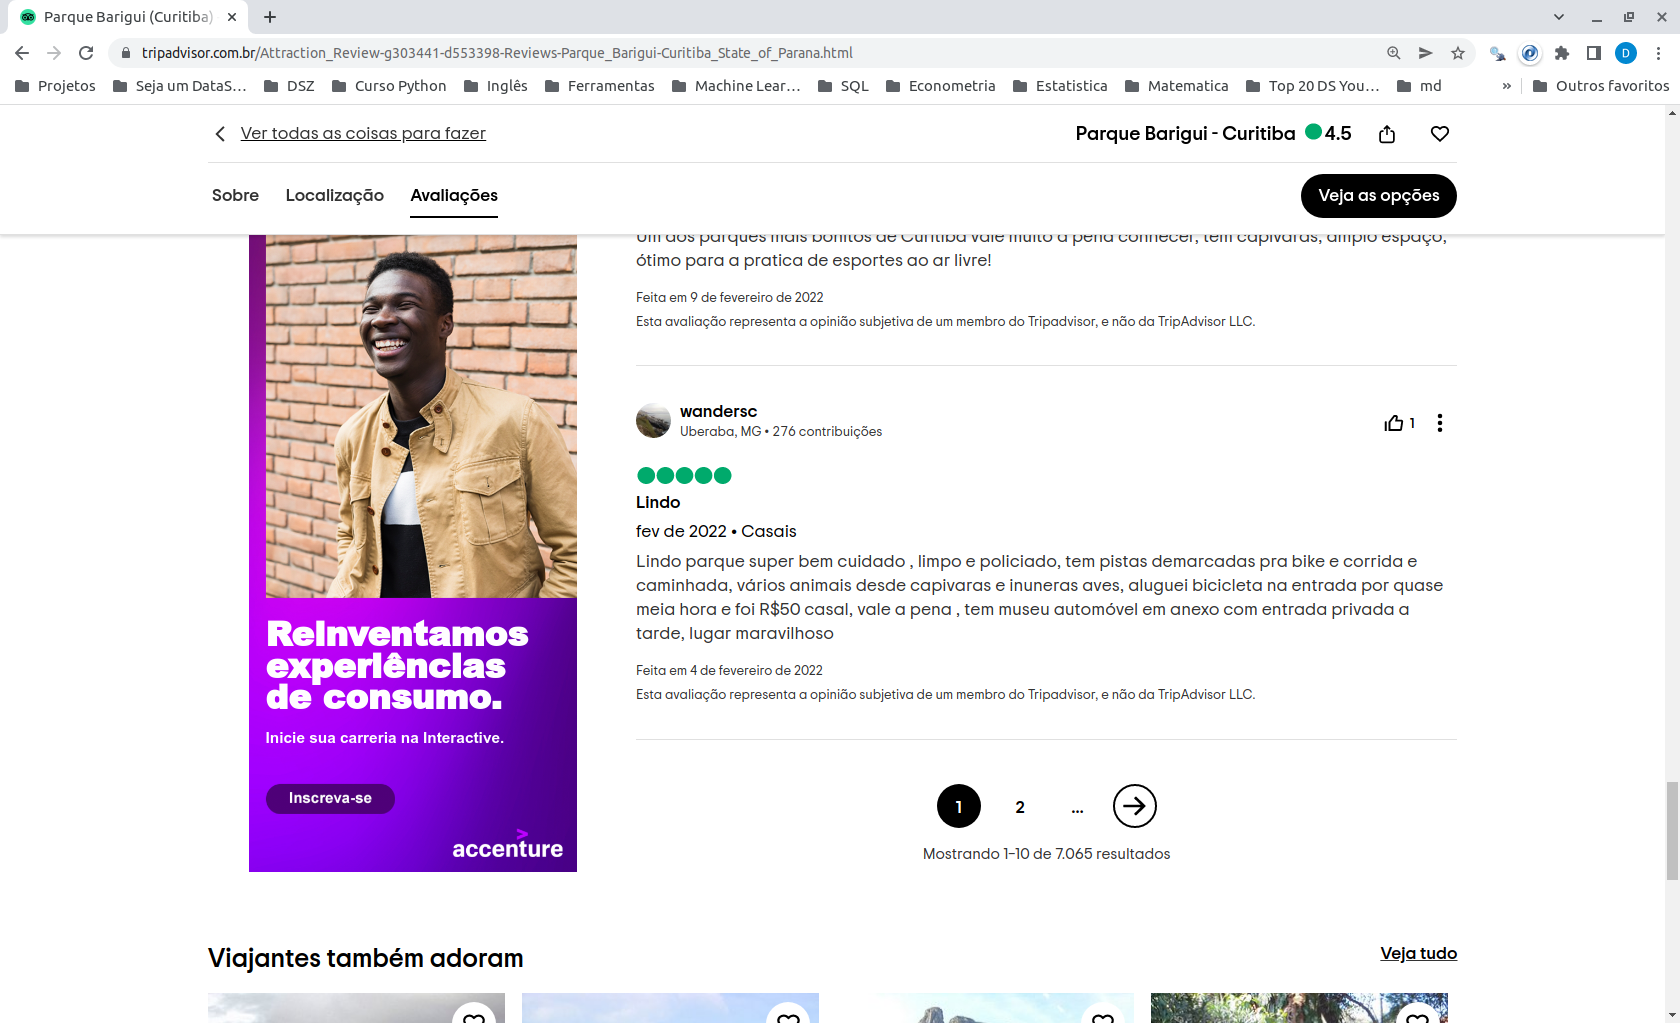

In [7]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/url_2.png")

# 3.0 Teste na API da plataforma com o Scrapy shell

No terminal:

   * scrapy shell url

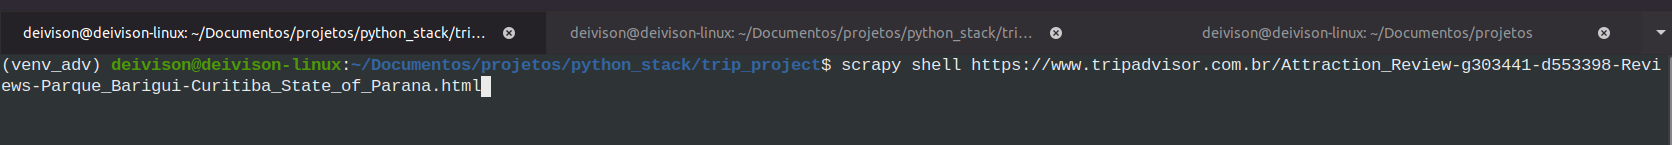

In [8]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/shell_1.png")

# 4.0 Alterar configurações do arquivos items.py na pasta do projeto

Configurar arquivo itens.py

* Nomear as variaveis que serao passadas na aranha

    * Aranha entra no site
    * Coletara as informacoes e transferir para as variaveis

* Alterar:
    
    * Remover pass
    * nomear variaveis
    * autor_comentario = scrapy.Field()
    * autor_endereco    = scrapy.Field()
    * comentario_titulo = scrapy.Field()
    * comentario_corpo  = scrapy.Field()
    * comentario_data   = scrapy.Field()
    
* Salvar arquivo itens.py 

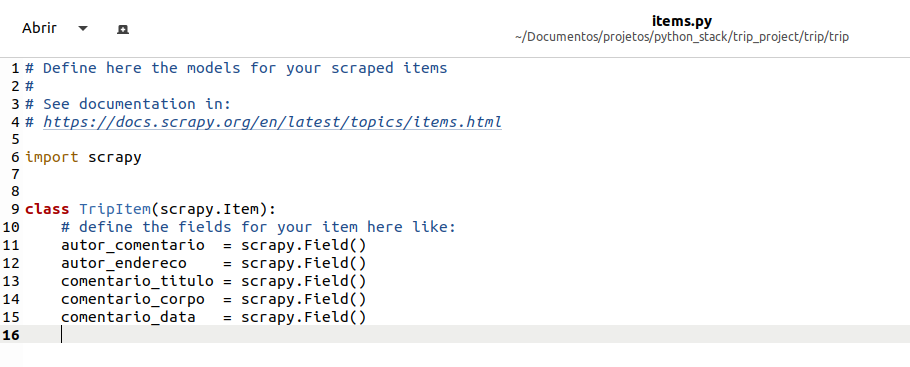

In [9]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/itens.png")

# 5.0 Código da aranha (spider)

**O script da aranha está no arquivo tripadvisor.py que fica localizado na pasta "spiders"**

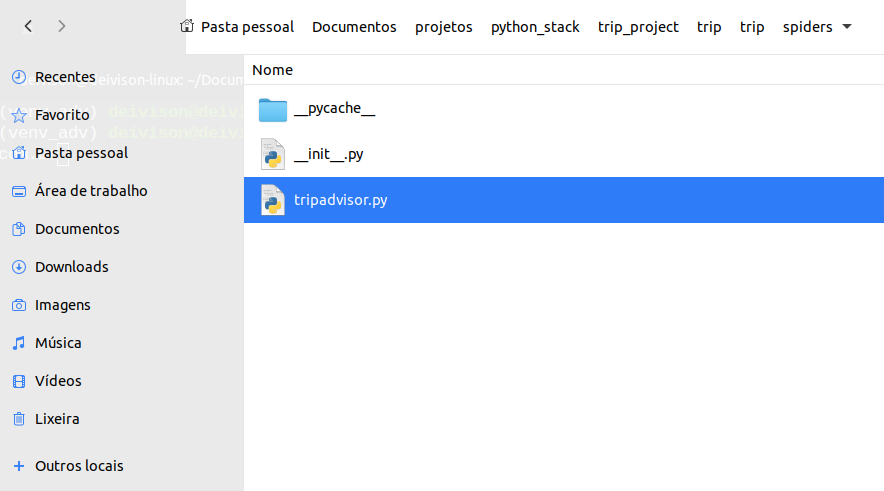

In [10]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/projeto_3.png")

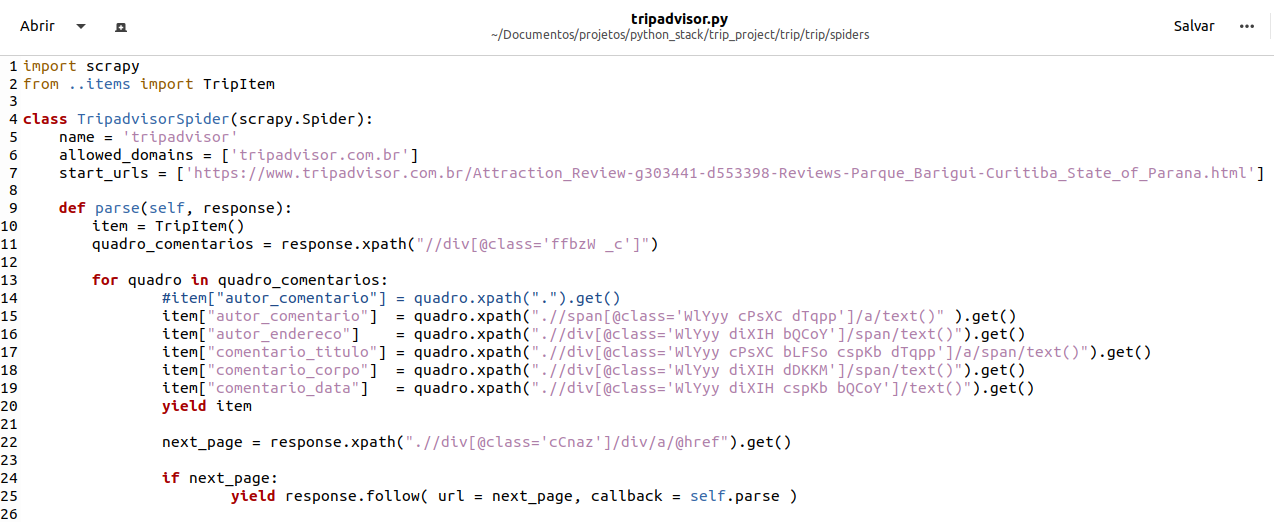

In [11]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/aranha_1.png")

In [12]:
import scrapy

from ..items import TripadvisorItem

class ComentariosSpider(scrapy.Spider):
    name = 'comentarios'
    allowed_domains = ['tripadvisor.com.br']
    # endereço da pagina inicial
    start_urls = ['https://www.tripadvisor.com.br/Attraction_Review-g303441-d553398-Reviews-Parque_Barigui-Curitiba_State_of_Parana.html']

def parse(self, response):
    #declarar item com que foi importado na aranha
    #aranha entrar no site - pegar o dado - processa o dado junto items.py
    item = TripadvisorItem()
    
    #Criar variavel onde sera os endereços das caixas de comentarios do site
    quadros_comentarios = response.xpath("//div[@class='ffbzW _c']")
    
    #criar iteração para percorrer as caixas de comentarios
    for quadro in  quadro_comentarios:
        #passar o endereço da informação relacionando com a variavel passada no items.py
        item["autor_comentario"] = quadro.xpath(".").get() #somente pegar um nome
        #ponto - liga endereço com tudo que eu posso querer
        
        item["autor_comentario"]   = quadro.xpath(".//div[@class='cjhIj']/span/a/text()").get()
        item["autor_endereco"]     = quadro.xpath(".//div[@class='ddOtn']/div/span/text()").get()
        item["comentario_titulo"]  = quadro.xpath(".//div[@class='WlYyy cPsXC bLFSo cspKb dTqpp']/a/span/text()").get()
        item["comentario_corpo"]   = quadro.xpath(".//div[@class='WlYyy diXIH dDKKM']/span/text()").get()
        item["comentario_data"]    = quadro.xpath(".//div[@class='WlYyy diXIH cspKb bQCoY']/text()").get()
        
        #salvar arquivo
        yield item
        
        #caminho botão na pagina -- sem "." antes do "//" 
        #endereco relativo --> /Attraction_Review-g303441-d553398-Reviews-or10-Parque_Barigui-Curitiba_State_of_Parana.html
        next_page = response.xpath("//div[@class='cCnaz']/div/a/@href").get()
        
        #se next_page verdadeiro
        if next_page:
            
            #.follow --> seguir um comando relativo contendo tripadvisor.com.br/ endereco relativo
            #url = endereco relativo
            #callback = chama a função .parse
            yield response.follow(url = next_page, callback = self.parse)
        

# 6.0 Executar o Web Crawler

No terminal:

* Rodar o crawler da aranha

    * Retornar informacoes em arquivo .csv
    
        * scrapy crawl comentarios -o informacoes.csv 
    
    * Retornar informacoes em arquivo .json
    
         * scrapy crawl comentarios -o informacoes.json

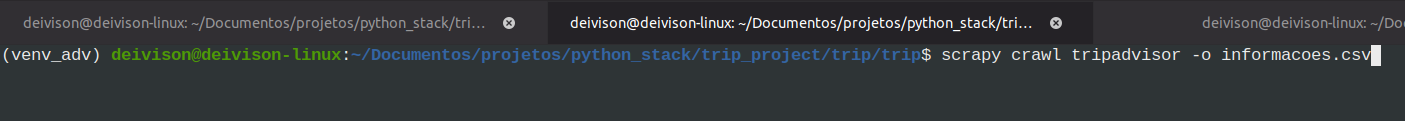

In [13]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/informacoes_csv_1.png")

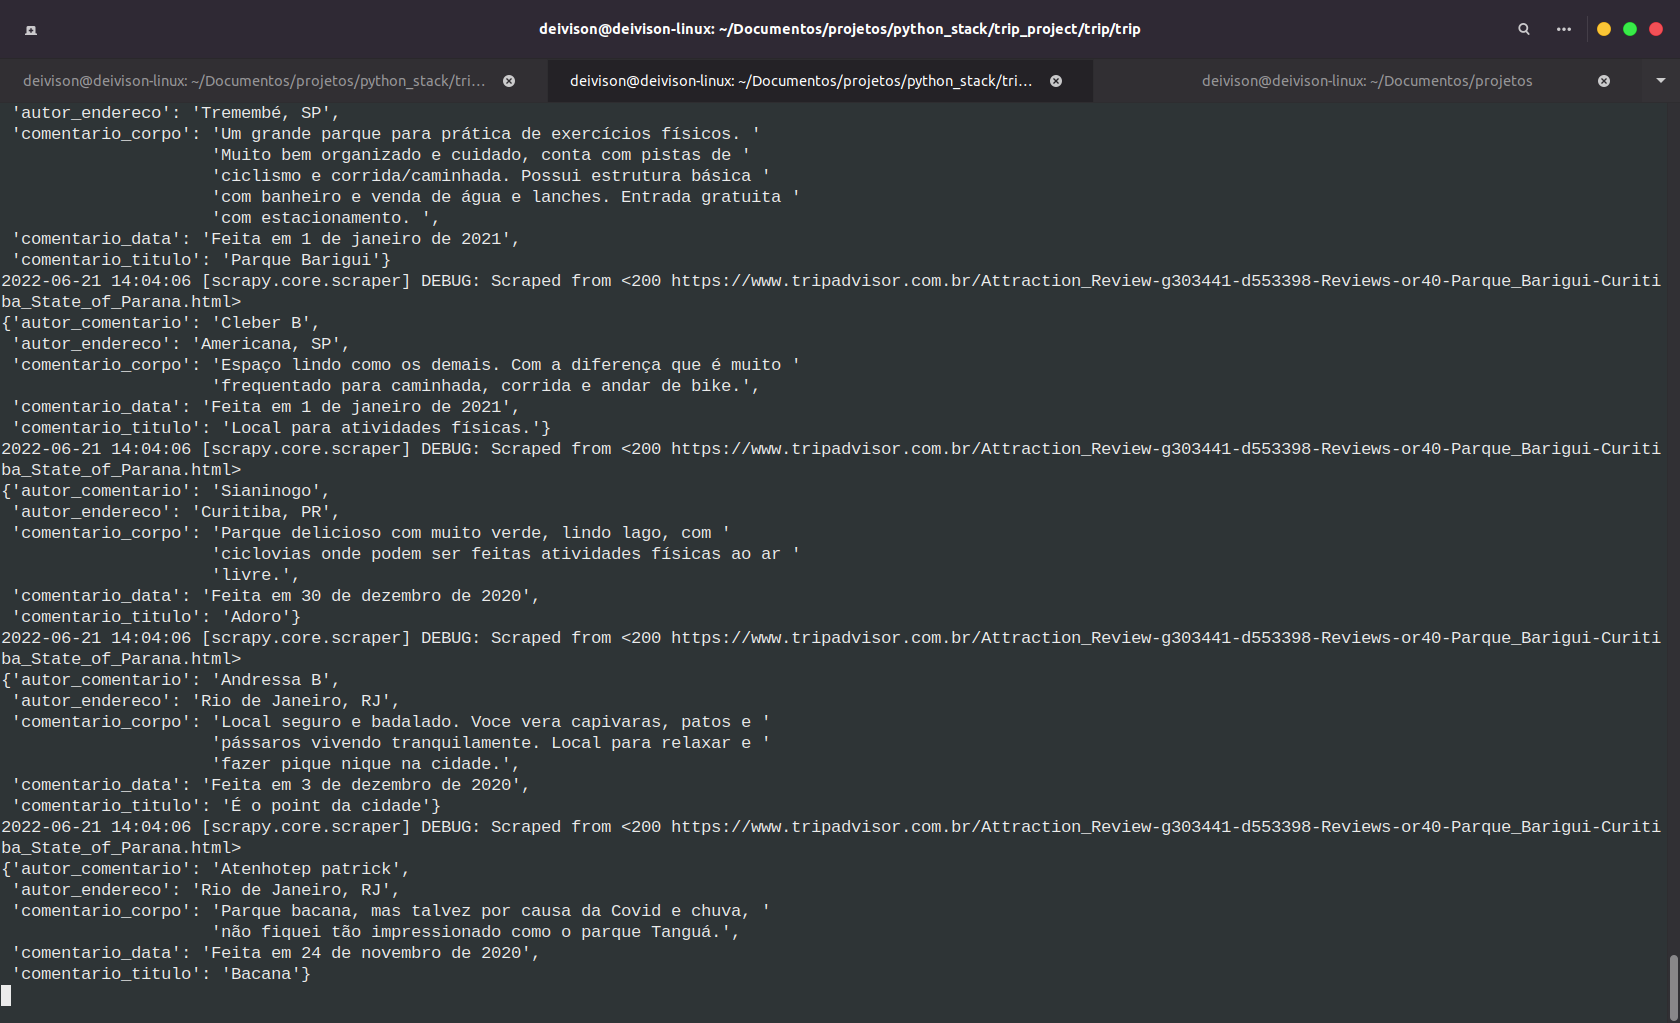

In [14]:
Image( "/home/deivison/Documentos/projetos/python_stack/trip_project/imagens/informacoes_csv_2.png")

# 7.0 Arquivo informacoes.csv

In [15]:
data = pd.read_csv( './data/informacoes.csv')
data.head(10)

,autor_comentario,autor_endereco,comentario_corpo,comentario_data,comentario_titulo
0,Mauricio,"Joinville, SC",Local maravilhoso com diversas opções para laz...,Feita em 18 de junho de 2022,O melhor parque da cidade
1,Mário,6 contribuições,"""praia dos curitianos"" nunca vi nome tão justo...",Feita em 12 de junho de 2022,minha primeira vez com uma capivara
2,Daniela G,"São Paulo, SP","Adorei a divisão de pista para caminhada, pist...",Feita em 7 de junho de 2022,"Muito espaço para os animais, local tranquilo"
3,RodrigoPaiva,"Montes Claros, MG","Um dos maiores da cidade, sendo, também, um do...",Feita em 22 de maio de 2022,Criado em 1972
4,Mylavh,"Brasília, DF",lugar bem agradável e muito grande. boa opção ...,Feita em 11 de maio de 2022,boa opçao
5,Lucas Cabral,"Brasília, DF","Lugar muito bonito, ambiente agradável, vale m...",Feita em 16 de abril de 2022,Top
6,Monica Criscili,"Curitiba, PR","Local lindo, incrível para atividade física e ...",Feita em 11 de abril de 2022,Excelente local pra lazer e atividade física
7,Gabriel HS Venancio,"Curitiba, PR","Tem de tudo... corrida, caminhada, patins, ska...",Feita em 29 de março de 2022,Cheio de gente bonita fazendo esporte
8,Karen Takagi,"Cananéia, SP",Um dos parques mais bonitos de Curitiba vale m...,Feita em 9 de fevereiro de 2022,um dos parques mais bonitos de curitiba!
9,wandersc,"Uberaba, MG","Lindo parque super bem cuidado , limpo e polic...",Feita em 4 de fevereiro de 2022,Lindo


## Dimensão dos dados

In [16]:
print('\nNúmero de linhas coletadas : {}'.format(data.shape[0]) )
print('\nNúmero de colunas coletadas: {}'.format(data.shape[1]) )


Número de linhas coletadas : 7065

Número de colunas coletadas: 5


## NA values

In [17]:
data.isna().sum()

autor_comentario      2
autor_endereco        0
comentario_corpo     29
comentario_data       0
comentario_titulo    29
dtype: int64

## Informações

In [18]:
data['autor_endereco'].unique().shape[0]

1060

In [19]:
data['autor_comentario'].unique().shape[0]

6518